# this notebook is for the data analysis discussion post. we combined 5years data together, and selected columns( features) that we are interested and the target Q237 (stay or go decision) to make a new dataframe for future ML project.

In [1]:
#load libraries 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
sns.set(style="ticks", color_codes=True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# to look up the questions 
questions= pd.read_csv('/Users/wuc3/Downloads/Capstone/Jen db tables/survey_questions.csv', low_memory=False)

# Below are questions in EEI, GSI, demographics,New Inclusion Quotient 

EEI index questions
Q104 my_work_experience My work gives me a feeling of personal accomplishment.
Q105 my_work_experience I know what is expected of me on the job. 
Q106 my_work_experience My workload is reasonable. 
Q107 my_work_experience My talents are used well in the workplace.
Q108 my_work_experience I know how my work relates to the agency's goals. 
Q122 my_work_experience Supervisors in my work unit support employee development.
Q123 my_work_experience My supervisor listens to what I have to say. 
Q124 my_work_experience My supervisor treats me with respect.
Q125 my_work_experience I have trust and confidence in my supervisor. 
Q126 my_work_experience Overall_ how good a job do you feel is being done by your immediate supervisor? 
Q127 my_work_experience In my organization_ senior leaders generate high levels of motivation and commitment in the workforce.
Q128 my_work_experience My organization's senior leaders maintain high standards of honesty and integrity.
Q129 my_work_experience Managers communicate the goals of the organization.
Q131 my_work_experience Overall_ how good a job do you feel is being done by the manager directly above your immediate supervisor? 
Q132 my_work_experience I have a high level of respect for my organization's senior leaders. 
Q237 demographics Are you considering leaving your organization within the next year_ and if so_ why?

Gsi	index questions
Q118	my_agency	I recommend my organization as a good place to work.
Q137	individual	Considering everything_ how satisfied are you with your job?
Q138	individual	Considering everything_ how satisfied are you with your pay?
Q139	individual	Considering everything_ how satisfied are you with your organization?

demographics

Q222	demographics	Please select the racial category or categories with which you most closely identify. 
Q223	demographics	Are you of Hispanic_ Latino_ or Spanish origin? 
Q224	demographics	Are you an individual with a disability? 
Q225	demographics	What is your age group? 
Q226	demographics	What is your supervisory status? 
Q227	demographics	How long have you been with the Federal Government (excluding military service)? 
Q229	demographics	What is your US military service status? 
Q232	demographics	Has your intention to leave your organization within the next year changed because of the COVID-19 pandemic?
Q235	demographics	What is the highest degree or level of education you have completed?
Q237	demographics	Are you considering leaving your organization within the next year_ and if so_ why?!
Q232    Has your intention to leave your organization within the next year changed because of the COVID-19 pandemic?

New Inclusion Quotient index questions
Q130	my_work_experience	Managers promote communication among different work units (for example_ about projects_ goals_ needed resources).
Q268	my_work_experience	Managers support collaboration across work units to accomplish work objectives.
Q103	my_work_experience	I feel encouraged to come up with new and better ways of doing things.
Q238	my_work_experience	I have enough information to do my job well.
Q255	my_agency	Employees have a feeling of personal empowerment with respect to work processes.
Q111	my_work_unit	In my work unit_ steps are taken to deal with a poor performer who cannot or will not improve.
Q113	my_work_unit	In my work unit_ differences in performance are recognized in a meaningful way.
Q251	my_work_unit	Awards in my work unit depend on how well employees perform their jobs.
Q260	my_agency	Arbitrary action_ personal favoritism and coercion for partisan political purposes are not tolerated.
Q261	my_agency	Prohibited Personnel Practices (for example_ illegally discriminating for or against any employee/applicant_ obstructing a person's right to compete for employment_ knowingly violating veterans' preference requirements) are not tolerated.
Q121	my_work_experience	My supervisor is committed to a workforce representative of all segments of society.
Q256	my_agency	Creativity and innovation are rewarded.
Q258	my_agency	Policies and programs promote diversity in the workplace (for example_ recruiting minorities and women_ training in awareness of diversity issues_ mentoring).
Q266	my_work_experience	Supervisors work well with employees of different backgrounds.
Q120	my_work_experience	My supervisor supports my need to balance work and other life issues.
Q264	my_work_experience	My supervisor provides me with constructive suggestions to improve my job performance.

In [3]:
#look specific [[rows],[cols];
questions.iloc[[2,186],[2]]

,question_text
2,Randomly Assigned Number for individual cases
186,Are you looking for another job because of the...


In [4]:
#Joy's questions info
dfquestions = pd.read_csv('/Users/wuc3/Downloads/Capstone/survey_questions joy1.csv' )
dfquestions.head(50)

,Q104,my_work_experience,My work gives me a feeling of personal accomplishment.,number,Q104.1,"1,2,3,4,5, null ,x"
0,Q105,my_work_experience,I know what is expected of me on the job.,number,Q105,"1,2,3,4,5, null ,x"
1,Q106,my_work_experience,My workload is reasonable.,varchar,Q106,"1,2,3,4,5, null ,x"
2,Q107,my_work_experience,My talents are used well in the workplace.,varchar,Q107,"1,2,3,4,5, null ,x"
3,Q108,my_work_experience,I know how my work relates to the agency's goals.,varchar,Q108,"1,2,3,4,5, null ,x"
4,Q122,my_work_experience,Supervisors in my work unit support employee d...,varchar,Q122,"1,2,3,4,5, null ,x"
5,Q123,my_work_experience,My supervisor listens to what I have to say.,number,Q123,"1,2,3,4,5, null ,x"
6,Q124,my_work_experience,My supervisor treats me with respect.,number,Q124,"1,2,3,4,5, null ,x"
7,Q125,my_work_experience,I have trust and confidence in my supervisor.,number,Q125,"1,2,3,4,5, null ,x"
8,Q126,my_work_experience,Overall_ how good a job do you feel is being d...,number,Q126,"1,2,3,4,5, null ,x"
9,Q127,my_work_experience,In my organization_ senior leaders generate hi...,varchar,Q127,"1,2,3,4,5, null ,x"


# belwo is to load FEVS survey data from 2016 to 2020

In [5]:
# need to give the path of these file on you own
df2016 = pd.read_csv('/Users/wuc3/Downloads/Capstone/Jen db tables/Standardized_Columns_fevs_2016_prdf.csv', low_memory=False)
df2017 = pd.read_csv('/Users/wuc3/Downloads/Capstone/Jen db tables/Standardized_Columns_fevs_2017_prdf.csv', low_memory=False)
df2018 = pd.read_csv('/Users/wuc3/Downloads/Capstone/Jen db tables/Standardized_Columns_fevs_2018_prdf.csv', low_memory=False)
df2019 = pd.read_csv('/Users/wuc3/Downloads/Capstone/Jen db tables/Standardized_Columns_fevs_2019_prdf.csv', low_memory=False)
df2020 = pd.read_csv('/Users/wuc3/Downloads/Capstone/Jen db tables/Standardized_Columns_fevs_2020_prdf.csv', low_memory=False)


In [6]:
#find cols' names in a dataframe: 
for col in df2016.columns:
    print(col)

response_id
year
agency_id
Q234
Q226
Q228
Q225
Q236
Q237
Q102
Q238
Q103
Q104
Q239
Q105
Q240
Q241
Q242
Q106
Q107
Q108
Q243
Q244
Q245
Q246
Q109
Q247
Q248
Q110
Q249
Q250
Q111
Q113
Q251
Q252
Q253
Q254
Q114
Q255
Q115
Q256
Q257
Q258
Q116
Q259
Q260
Q261
Q117
Q118
Q119
Q120
Q262
Q263
Q121
Q264
Q122
Q123
Q124
Q265
Q125
Q126
Q127
Q128
Q266
Q129
Q267
Q130
Q268
Q131
Q132
Q133
Q134
Q135
Q136
Q269
Q270
Q271
Q137
Q138
Q139
Q233
random
Q112
Q140
Q141
Q142
Q143
Q144
Q145
Q146
Q147
Q148
Q149
Q150
Q151
Q152
Q153
Q154
Q155
Q156
Q157
Q158
Q159
Q160
Q161
Q162
Q163
Q164
Q165
Q166
Q167
Q168
Q169
Q170
Q171
Q172
Q173
Q174
Q175
Q176
Q177
Q178
Q179
Q180
Q181
Q182
Q183
Q184
Q185
Q186
Q187
Q188
Q189
Q190
Q191
Q192
Q193
Q194
Q195
Q196
Q197
Q198
Q199
Q200
Q201
Q202
Q203
Q204
Q205
Q206
Q207
Q208
Q209
Q210
Q211
Q212
Q213
Q214
Q215
Q216
Q217
Q218
Q219
Q220
Q221
Q222
Q223
Q224
Q227
Q229
Q230
Q231
Q232
Q235
Q272
Q273
Q274
Q275
Q276
Q277
Q278
Q279
Q280
Q281
Q282
Q283
Q284
Q285


# Below is to combine 5 years FEVS data, produced a new dataframe contains 3 indic quesitons and demographics info, called "combined5yearindex3", this combined5yearindex3 dataframe can be furture used for ML 

In [7]:
#to combine 5 year survey data
frames = [df2016, df2017, df2018,df2019,df2020]
combined5year= pd.concat(frames)
#to generate a subsets for questions that we are interested from 3 indic quesions and demography info:
combined5yearindex3 =pd.DataFrame(data=combined5year,
                           columns=['year','agency_id','Q222','Q223','Q224','Q225','Q226','227','Q229','Q235',
                                    'Q104','Q105','Q106','Q107','Q108','Q122','Q123','Q124','Q125','Q126','Q127','Q128','Q129','Q131','Q132',
                                    'Q118','Q137','Q138','Q139',
                                    'Q130','Q268','Q103','Q238','Q255','Q111','Q113','Q251','Q260','Q261',
                                    'Q121','Q256','Q258','Q266','Q120','Q264',
                                               'Q232','Q237'])


In [8]:
combined5yearindex3.head()
combined5yearindex3.tail()
# looks the 2020 data has no Q237 , but a Q232

,year,agency_id,Q222,Q223,Q224,Q225,Q226,227,Q229,Q235,...,Q260,Q261,Q121,Q256,Q258,Q266,Q120,Q264,Q232,Q237
624795,2020,HS,C,B,B,B,A,NaN,B,NaN,...,NaN,NaN,X,NaN,NaN,NaN,5,NaN,B,NaN
624796,2020,HS,A,B,B,B,A,NaN,NaN,NaN,...,NaN,NaN,5,NaN,NaN,NaN,5,NaN,NaN,NaN
624797,2020,HS,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN,...,NaN,NaN,5,NaN,NaN,NaN,5,NaN,NaN,NaN
624798,2020,HS,B,A,B,A,A,NaN,B,NaN,...,NaN,NaN,5,NaN,NaN,NaN,5,NaN,NaN,NaN
624799,2020,HS,B,A,B,A,B,NaN,B,NaN,...,NaN,NaN,5,NaN,NaN,NaN,5,NaN,NaN,NaN


# Save combined5yearindex3 dataframe to a csv file, this CVS file can be used for future ML

In [9]:
# save a csv file to the local:
combined5yearindex3.to_csv("combined5yearindex3.csv", sep='\t', encoding='utf-8')

# Below analyses are for describe the  combined5yearindex3 dataframe, byyear to look at the responses numbers at each year; byQ237 is to look at the response frequences by Q237( stayorgo)

In [53]:
#response frequence by years
byyear= combined5yearindex3['year'].value_counts()
#response frequence by Q237 stayorgo
byQ237=combined5yearindex3['Q237'].value_counts()
print(byyear)
print(byQ237)
row_count = combined5yearindex3.shape[0]
print(row_count)
col_count = combined5yearindex3.shape[1]
print(f"There are {row_count:.0f} survey responses over the last 5 years, and {col_count:.0f} features were concidered") 

2020    624800
2019    615395
2018    598003
2017    486105
2016    407789
Name: year, dtype: int64
A    1342968
B     350994
D     215417
C      79508
Name: Q237, dtype: int64
2732092
There are 2732092 survey responses over the last 5 years, and 47 features were concidered


# Below are Visualizations "byyear" and "byQ237": the results indicated that there are around 400,000 -630,000 responses for each year's survey within the 5 years(2016-2020). 
# There is only 3.998 percent of people decided to leave Federal to other places druing 2016 to 2020.
# There is 67.524 percent of people devided to stay in Federal with the same job during 2016 to 2020.
# The data with rigrad to stay or go is imbalanced

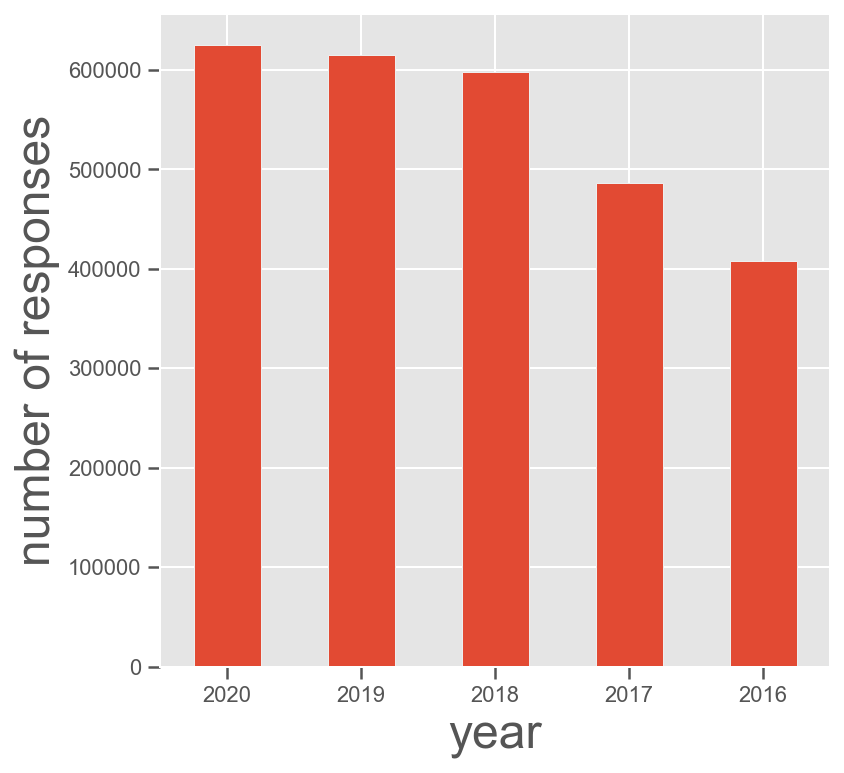

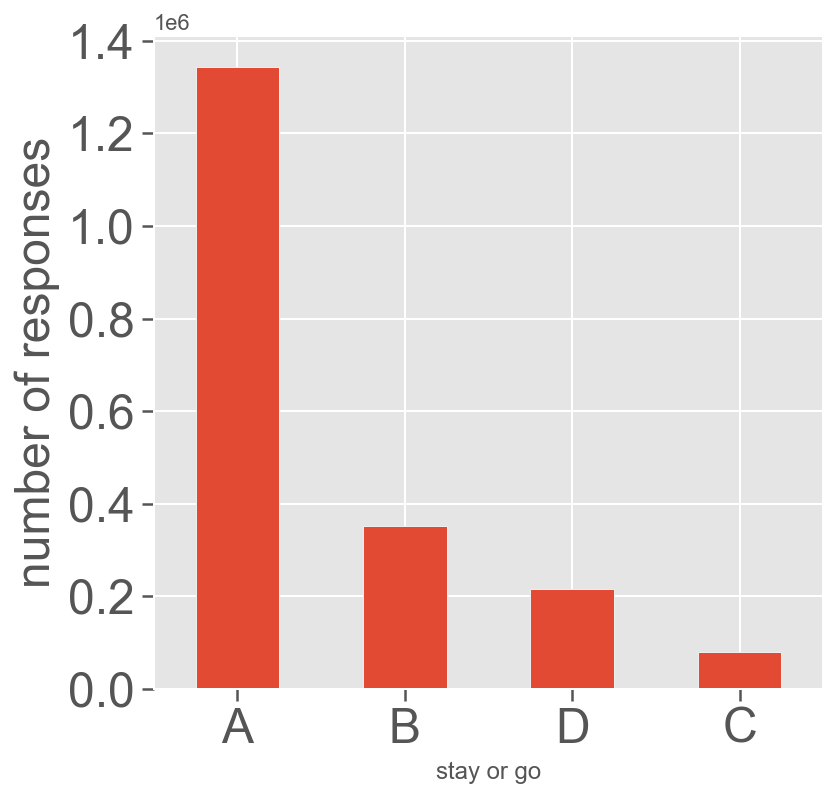

There are 400000-624800 peoples took the survey each year during 2016 to 2020.
There is only 3.998 percent of people decided to leave Federal to other places druing 2016 to 2020.
There is 67.524 percent of people devided to stay in Federal with the same job during 2016 to 2020.
The data with rigrad to stay or go is imbalanced


In [22]:
plt.style.use('ggplot')
# create a bar graph to depict the frequencies
byyear.plot(kind='bar', figsize=(6,6),rot=0);
plt.xlabel('year',fontsize=24)
plt.ylabel('number of responses',fontsize=24)
plt.show()
byQ237.plot(kind='bar', figsize=(6,6),rot=0,fontsize=24);
plt.xlabel('stay or go')
plt.ylabel('number of responses', fontsize=24)
plt.show()
#caculate the percect of stayorgo decision
A =1342968
B =350994
D=215417
C=79508
Cfrequence=C/(A+B+C+D)
Afrequence=A/(A+B+C+D)
print("There are 400000-624800 peoples took the survey each year during 2016 to 2020.")
print( f"There is only {Cfrequence*100:.3f} percent of people decided to leave Federal to other places druing 2016 to 2020.")
print(f"There is {Afrequence*100:.3f} percent of people devided to stay in Federal with the same job during 2016 to 2020.")
print("The data with rigrad to stay or go is imbalanced")

# Below are Visualizations for each year by Q237"stayorgo"

In [12]:
#make sub-dataframe by year
byQ2372016=combined5yearindex3.loc[combined5yearindex3['year'] == 2016]['Q237'].value_counts()
byQ2372017=combined5yearindex3.loc[combined5yearindex3['year'] == 2017]['Q237'].value_counts()
byQ2372018=combined5yearindex3.loc[combined5yearindex3['year'] == 2018]['Q237'].value_counts()
byQ2372019=combined5yearindex3.loc[combined5yearindex3['year'] == 2019]['Q237'].value_counts()
byQ2322020=combined5yearindex3.loc[combined5yearindex3['year'] == 2020]['Q232'].value_counts()

print(byQ2372016, byQ2372017,byQ2372018,byQ2372019,byQ2322020)

A    260738
B     71018
D     40565
C     13849
Name: Q237, dtype: int64 A    317645
B     71128
D     51041
C     19504
Name: Q237, dtype: int64 A    382646
B    100354
D     62540
C     22298
Name: Q237, dtype: int64 A    381939
B    108494
D     61271
C     23857
Name: Q237, dtype: int64 B    69927
A    35017
Name: Q232, dtype: int64


Q237:Are you considering leaving your organization within the next year_ and if so_ why?A: No. B:Yes,to take another Federal job. C:Yes,to take a job outside Federal Gov. D:Other
Q232:Has your intention to leave your organization within the next year changed because of the COVID-19 pandemic?A: yes, changed. B:No,donot change


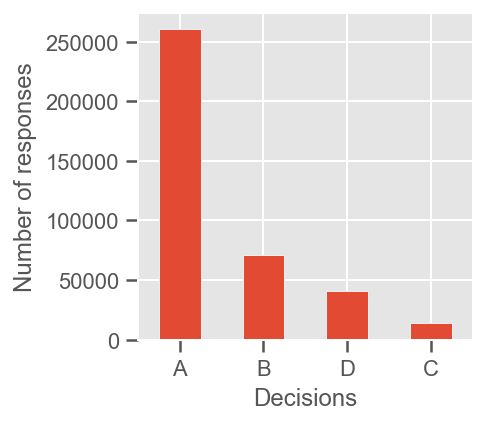

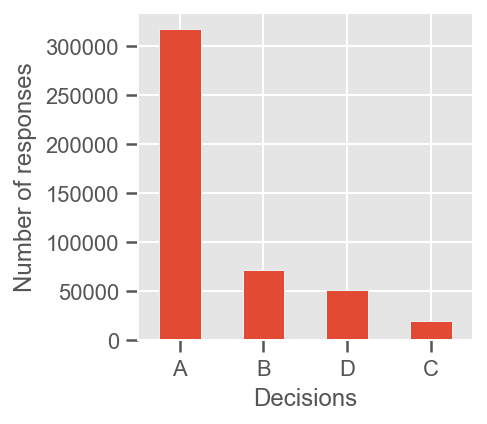

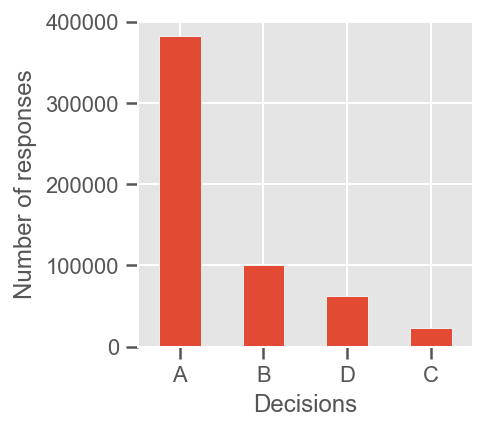

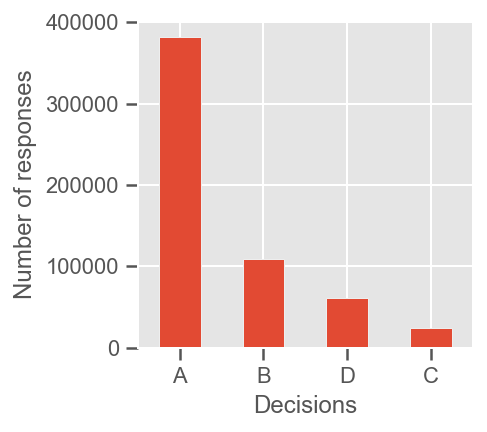

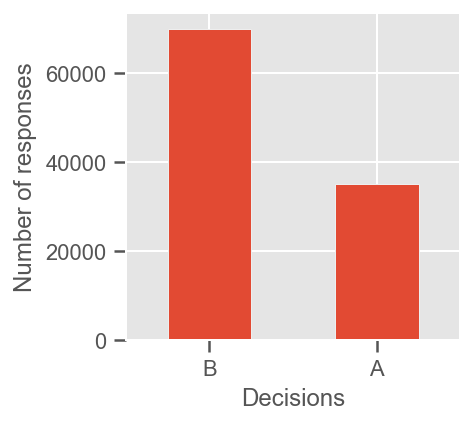

In [13]:
print("Q237:Are you considering leaving your organization within the next year_ and if so_ why?"
      "A: No.",
      "B:Yes,to take another Federal job.",
      "C:Yes,to take a job outside Federal Gov.",
      "D:Other")
print("Q232:Has your intention to leave your organization within the next year changed because of the COVID-19 pandemic?"
      "A: yes, changed.",
      "B:No,donot change")
plt.style.use('ggplot')
# create a bar graph to depict the frequencies for each year survey grouped by "stay or go"
plt.xlabel('Decisions')
plt.ylabel('Number of responses')
byQ2372016.plot(kind='bar', figsize=(3,3),rot=0);
plt.show()
byQ2372017.plot(kind='bar', figsize=(3,3),rot=0);
plt.xlabel('Decisions')
plt.ylabel('Number of responses')
plt.show()
byQ2372018.plot(kind='bar', figsize=(3,3),rot=0);
plt.xlabel('Decisions')
plt.ylabel('Number of responses')
plt.show()
byQ2372019.plot(kind='bar', figsize=(3,3),rot=0);
plt.xlabel('Decisions')
plt.ylabel('Number of responses')
plt.show()
byQ2322020.plot(kind='bar', figsize=(3,3),rot=0)
plt.xlabel('Decisions')
plt.ylabel('Number of responses')
plt.show()

 # Below analysis will be for EEI preliminary analysis for 5 year data


In [14]:
# make a sub-dataframe for only EEI index
dfEEI = pd.DataFrame(data=combined5yearindex3,columns=['year','agency_id','Q104','Q105','Q106','Q107','Q108','Q122','Q123','Q124','Q125','Q126','Q127','Q128','Q129','Q131','Q132','Q232','Q237'])
dfEEI.head(10)

,year,agency_id,Q104,Q105,Q106,Q107,Q108,Q122,Q123,Q124,Q125,Q126,Q127,Q128,Q129,Q131,Q132,Q232,Q237
0,2016,TR,4.0,4.0,4,4,3,5,5.0,4.0,5.0,4.0,3,4,2,5,3,NaN,A
1,2016,AF,3.0,NaN,4,2,4,X,4.0,4.0,4.0,3.0,X,X,4,X,3,NaN,A
2,2016,TR,5.0,4.0,5,NaN,5,4,5.0,4.0,4.0,4.0,4,4,4,4,5,NaN,A
3,2016,TR,4.0,4.0,4,4,4,5,5.0,5.0,5.0,5.0,3,3,4,5,3,NaN,D
4,2016,HE,5.0,5.0,4,5,5,5,5.0,5.0,5.0,5.0,5,5,4,5,5,NaN,A
5,2016,HE,4.0,4.0,2,4,5,4,4.0,4.0,4.0,5.0,1,3,1,2,2,NaN,A
6,2016,CM,3.0,2.0,4,4,4,X,5.0,5.0,5.0,4.0,4,X,4,X,3,NaN,D
7,2016,AF,5.0,5.0,5,5,5,5,5.0,5.0,5.0,5.0,5,4,5,5,5,NaN,A
8,2016,AF,5.0,5.0,4,5,5,5,5.0,5.0,5.0,5.0,5,5,5,5,5,NaN,D
9,2016,AG,5.0,5.0,4,4,4,5,5.0,5.0,5.0,5.0,5,5,5,5,5,NaN,A


# in the EEI index columns ,there are columns not the number values, they are strings, so we need to convert the string to numbers

In [15]:
dfEEI[['Q106','Q107','Q108','Q122','Q127','Q128','Q129','Q131','Q132']]= dfEEI[['Q106','Q107','Q108','Q122','Q127','Q128','Q129','Q131','Q132']].apply(pd.to_numeric,errors='coerce')

In [16]:
dfEEI.describe()

,year,Q104,Q105,Q106,Q107,Q108,Q122,Q123,Q124,Q125,Q126,Q127,Q128,Q129,Q131,Q132
count,2.732092e+06,2.714021e+06,2.713057e+06,2.708267e+06,2.675026e+06,2.706020e+06,2.641728e+06,2.673575e+06,2.670711e+06,2.671371e+06,2.673409e+06,2.601691e+06,2.498127e+06,2.615324e+06,2.506124e+06,2.612326e+06
mean,2.018206e+03,3.892961e+00,4.039856e+00,3.403266e+00,3.523792e+00,4.131097e+00,3.912410e+00,4.119914e+00,4.245753e+00,3.966252e+00,4.090176e+00,3.184621e+00,3.481229e+00,3.635467e+00,3.715589e+00,3.533088e+00
std,1.368376e+00,1.075541e+00,9.545277e-01,1.180824e+00,1.190464e+00,8.694855e-01,1.125589e+00,1.035939e+00,9.756713e-01,1.178057e+00,1.086124e+00,1.247318e+00,1.213221e+00,1.100786e+00,1.169134e+00,1.212328e+00
min,2.016000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,2.017000e+03,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
50%,2.018000e+03,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
75%,2.019000e+03,5.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,4.000000e+00
max,2.020000e+03,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


In [17]:
print(f"Q237: {dfEEI['Q237'].unique()}")

Q237: ['A' 'D' 'B' nan 'C']


# below boxplot analyzed EEI question scores grouped by Q237 decisions. The results indicated the peoples who made A (stay decision) rated high scores in the EEI index, and the ones who decided to leave the job rated lower score to those EEI questions. we indentified Q108, Q127, and Q128 has the most strike trend.

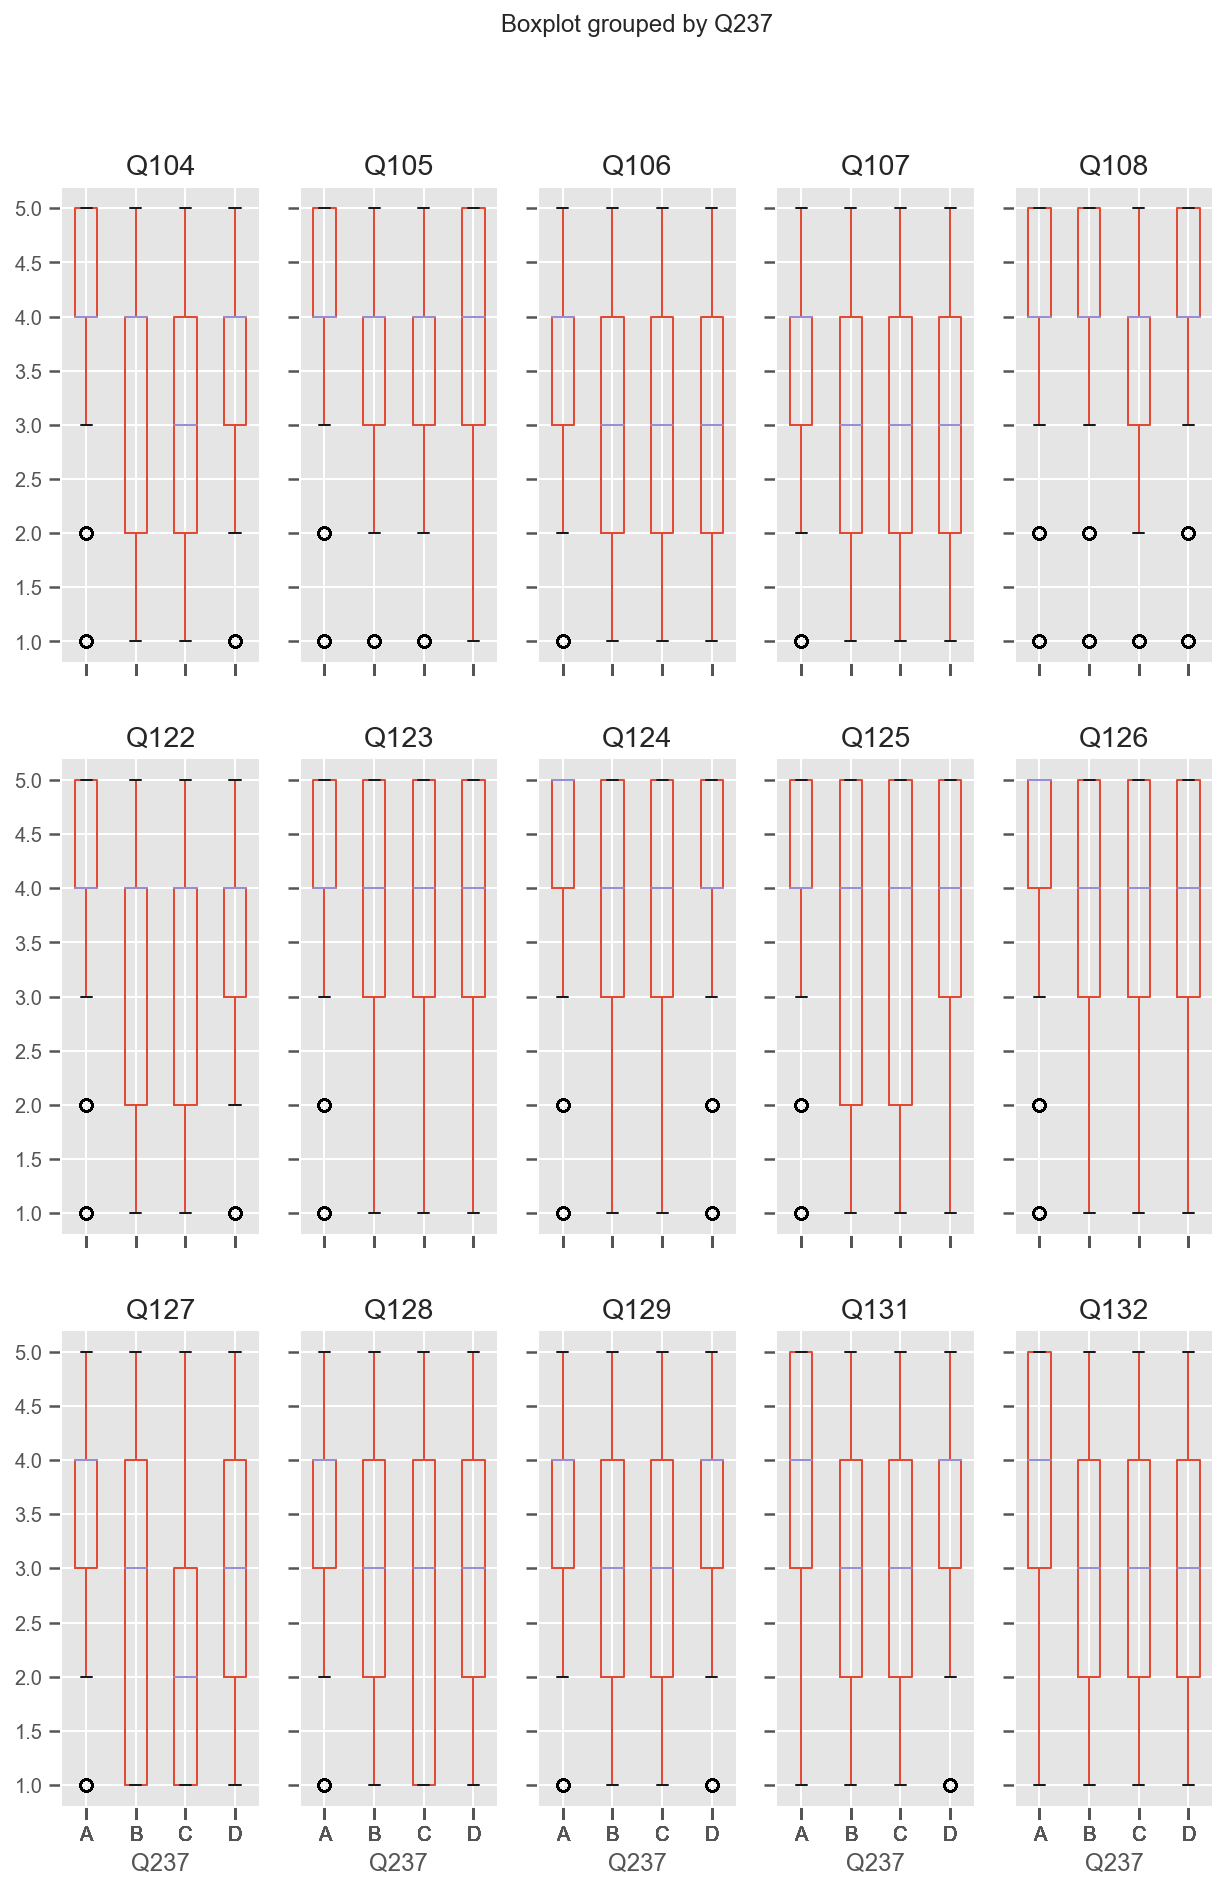

In [18]:
boxplot=dfEEI.boxplot(column=['Q104','Q105','Q106','Q107','Q108','Q122','Q123','Q124',
                                'Q125','Q126','Q127','Q128','Q129','Q131','Q132'],
                        by= 'Q237',
                        fontsize=10,layout=(3,5),figsize=(10,15))


# we indentified Q108, Q127, and Q128 has the most strike trend.put them together here, those survey questions could be the key factors that can predict the Q237 decisions.

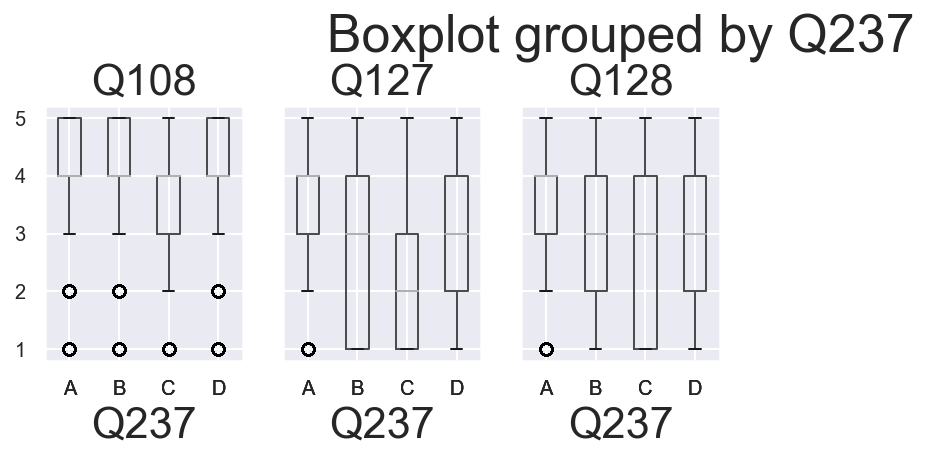

In [61]:
#Q108:my_work_experience I know how my work relates to the agency's goals.
#Q127 my_work_experience In my organization_ senior leaders generate high levels of motivation and commitment in the workforce.
#Q128 my_work_experience My organization's senior leaders maintain high standards of honesty and integrity.
boxplot=dfEEI.boxplot(column=['Q108','Q127','Q128'],
                        by= 'Q237',
                        fontsize=10,layout=(3,5),figsize=(10,8))

# Below analyses summarized  the average scores from all the quesions in the EEI, grouped by Q237 decisions. The resutls indicated, overall, the people who stayed rated high score in EEI, but those who decided to leave rated lower EEI score, and the ones who decided leave and find a job outside the Federal rated lowest EEI scores. 
# This resutls indicate that the EEI index could be a set of factors that predict the Q237 decision. so we will include these quesions in the ML dataset.

In [19]:
dfmean=dfEEI.groupby('Q237').mean()
dfmean=dfmean.drop(columns=['year'])
dfmean

,Q104,Q105,Q106,Q107,Q108,Q122,Q123,Q124,Q125,Q126,Q127,Q128,Q129,Q131,Q132
Q237,,,,,,,,,,,,,,,
A,4.124341,4.199393,3.550516,3.780468,4.250955,4.091595,4.284545,4.397207,4.172032,4.273466,3.390387,3.681299,3.815644,3.920661,3.740565
B,3.343996,3.615033,2.961137,2.820062,3.851979,3.315620,3.659737,3.831787,3.371097,3.548091,2.577171,2.906977,3.137159,3.122844,2.992362
C,3.194329,3.514830,2.813429,2.679388,3.698880,3.322491,3.698462,3.870963,3.428260,3.580033,2.374137,2.800339,3.048728,3.062816,2.756216
D,3.552215,3.796857,3.116780,3.130928,3.900455,3.525344,3.796399,3.941018,3.585652,3.766497,2.792565,3.093905,3.323252,3.342237,3.114954


In [20]:
dfmeantrans=dfmean.transpose()
dfmeantrans

Q237,A,B,C,D
Q104,4.124341,3.343996,3.194329,3.552215
Q105,4.199393,3.615033,3.514830,3.796857
Q106,3.550516,2.961137,2.813429,3.116780
Q107,3.780468,2.820062,2.679388,3.130928
Q108,4.250955,3.851979,3.698880,3.900455
Q122,4.091595,3.315620,3.322491,3.525344
Q123,4.284545,3.659737,3.698462,3.796399
Q124,4.397207,3.831787,3.870963,3.941018
Q125,4.172032,3.371097,3.428260,3.585652
Q126,4.273466,3.548091,3.580033,3.766497


People who decided leaving Federal workforce has the lowest response score(yaxis) for the questions asked in the EEI index.


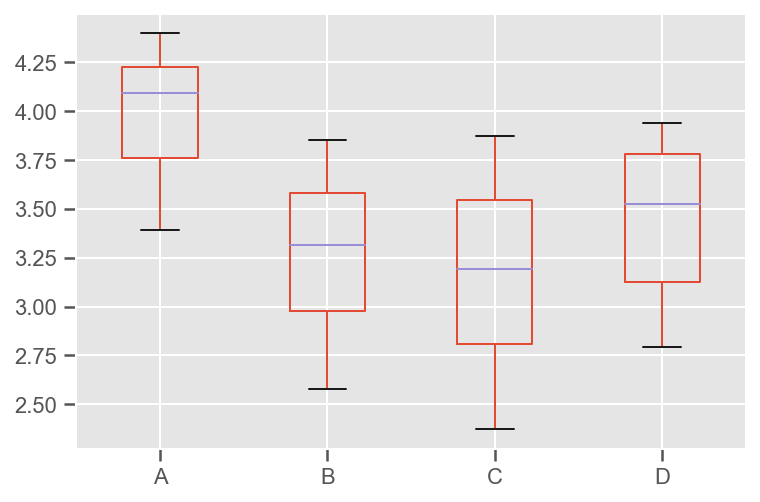

In [24]:
dfmeantrans.boxplot()
plt.xlabel('Decisions')
plt.ylabel('score of responses')
plt.show()
print("People who decided leaving Federal workforce has the lowest response score(yaxis) for the questions asked in the EEI index.")

# Below analysis will focus on GSI analysis from 5 year data

In [26]:
# create new dataframe dfGSI
dfGSI = pd.DataFrame(data=combined5yearindex3,columns=['year','agency_id','Q118','Q137','Q138','Q139','Q232','Q237'])
dfGSI.head(10)

,year,agency_id,Q118,Q137,Q138,Q139,Q232,Q237
0,2016,TR,5.0,4.0,3.0,4.0,NaN,A
1,2016,AF,2.0,2.0,3.0,2.0,NaN,A
2,2016,TR,5.0,4.0,4.0,4.0,NaN,A
3,2016,TR,4.0,3.0,2.0,3.0,NaN,D
4,2016,HE,5.0,5.0,5.0,5.0,NaN,A
5,2016,HE,4.0,4.0,1.0,2.0,NaN,A
6,2016,CM,1.0,2.0,2.0,2.0,NaN,D
7,2016,AF,5.0,5.0,5.0,5.0,NaN,A
8,2016,AF,5.0,4.0,4.0,4.0,NaN,D
9,2016,AG,5.0,5.0,5.0,5.0,NaN,A


In [27]:
dfGSI.describe()

,year,Q118,Q137,Q138,Q139
count,2.732092e+06,2.684586e+06,2.632819e+06,2.635587e+06,2.632678e+06
mean,2.018206e+03,3.779857e+00,3.768266e+00,3.596281e+00,3.595169e+00
std,1.368376e+00,1.087723e+00,1.065198e+00,1.145562e+00,1.103388e+00
min,2.016000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,2.017000e+03,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
50%,2.018000e+03,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
75%,2.019000e+03,5.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
max,2.020000e+03,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


In [28]:
#A	No
#B	Yes, to take another Federal job
#C	Yes, to take a job outside Federal Gov
#D	Other
# create a frequency count of the q237
stayorgo= dfGSI['Q237'].value_counts()
print(stayorgo)

A    1342968
B     350994
D     215417
C      79508
Name: Q237, dtype: int64


# only take Q139 as an example

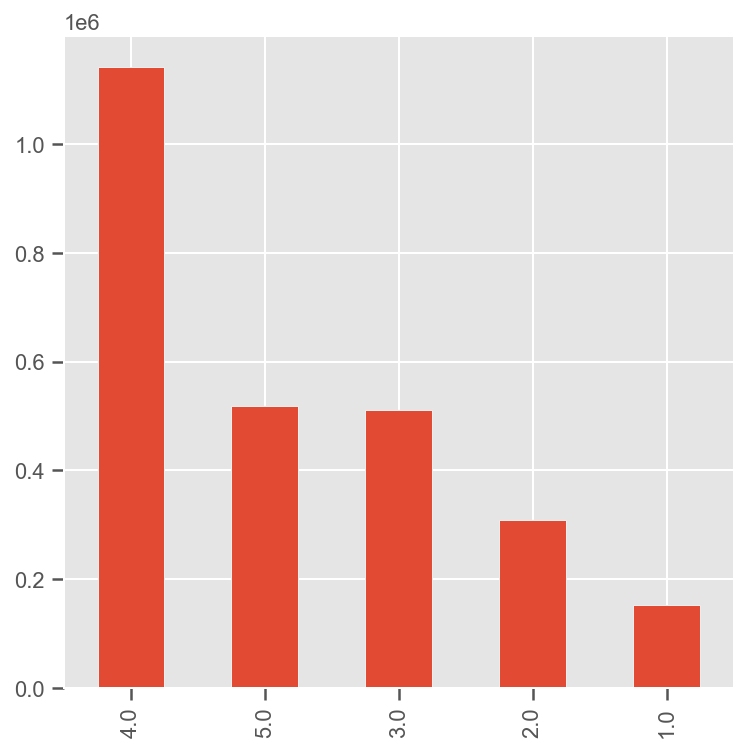

In [29]:
# look at the Q139 , the frequency counts for people rated different scores in Q139
overallsatis=dfGSI['Q139'].value_counts()
overallsatis.plot(kind='bar', figsize=(6,6));

 # chi-squar test

In [30]:
# make a cross table for chi-squar test
contingency_table = pd.crosstab(
    dfGSI['Q237'],
    dfGSI['Q139'],
    margins = True
)
contingency_table

Q139,1.0,2.0,3.0,4.0,5.0,All
Q237,,,,,,
A,31695,94450,218923,659022,330292,1334382
B,49994,82789,95527,101165,19586,349061
C,15290,21686,19794,18640,3699,79109
D,25496,40663,52856,70807,23484,213306
All,122475,239588,387100,849634,377061,1975858


# Each cell in the above table represents a frequency count. For example, the intersection of the 'A' row and the '4.0' column of the table would represent the number of response who rated 4 score of the Q139 from our sample dataset that who made decision A(stay) . The intersection of the 'All' row and the "4.0" column would represent the total number of people who rated 4.0 score regadless there answers for Q237

In [31]:
#only take a row tolook all the values
Acount = contingency_table.iloc[0][0:5].values
print(Acount)

[ 31695  94450 218923 659022 330292]


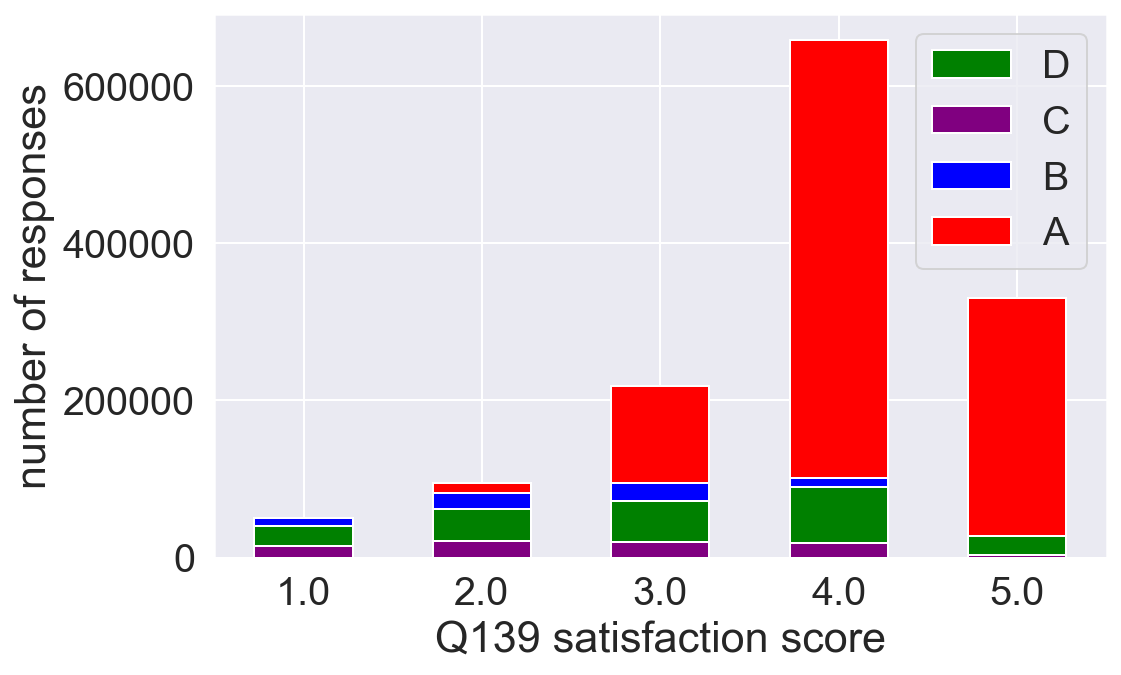

In [32]:
#Assigns the frequency values
Acount = contingency_table.iloc[0][0:5].values
Bcount = contingency_table.iloc[1][0:5].values
Ccount = contingency_table.iloc[2][0:5].values
Dcount = contingency_table.iloc[3][0:5].values
#Plots the bar chart
fig = plt.figure(figsize=(8, 5))
sns.set(font_scale=1.8)
categories = ["1.0","2.0","3.0","4.0","5.0"]
p1= plt.bar(categories, Acount, 0.55, color='red')
p2 = plt.bar(categories, Bcount, 0.55, color='blue')
p3 = plt.bar(categories, Ccount, 0.55, color='purple')
p4 = plt.bar(categories, Dcount, 0.55, color='green',bottom=Ccount)
plt.legend((p4[0], p3[0],p2[0], p1[0]), ('D', 'C','B','A'))
plt.xlabel('Q139 satisfaction score')
plt.ylabel('number of responses')
plt.show()
 

# The Null and Alternate Hypotheses
Recall that we are interested in knowing if there is a relationship between 'q139 satisfaction score' and 'Q237 stayorgo decision'. In order to do so, we would have to use the Chi-squared test. But first, let's state our null hypothesis and the alternative hypothesis.

𝐻0:There is no statistically significant relationship between "stayorgo decisions" and the "q139 satisfaction score". 
𝐻𝑎:There is a statistically significant relationship between "stayorgo decisions" and the "q139 satisfaction score". 



# below 𝐻0:There is no statistically significant relationship between "stayorgo A and B decision" and the "q139 satisfaction score".

In [33]:
#A	No
#B	Yes, to take another Federal job
f_obs = np.array([Acount,Bcount])
print(f_obs)

[[ 31695  94450 218923 659022 330292]
 [ 49994  82789  95527 101165  19586]]


In [34]:
chi2_results = stats.chi2_contingency(f_obs)
print(chi2_results)

(246231.5684779903, 0.0, 4, array([[ 64750.82981604, 140488.58874224, 249248.96174091,
        602562.63469212, 277330.9850087 ],
       [ 16938.17018396,  36750.41125776,  65201.03825909,
        157624.36530788,  72547.0149913 ]]))


In [35]:
p_value =chi2_results[1]
df = chi2_results[2]
chi2_test_statistic = chi2_results[0]
print(f"The chi-squared value we calculated was {chi2_test_statistic:.3f}, ")
print(f"and with {df} degrees of freedom, the p-value this results in is {p_value:.3f}.")

The chi-squared value we calculated was 246231.568, 
and with 4 degrees of freedom, the p-value this results in is 0.000.


# below 𝐻0:There is no statistically significant relationship between "stayorgo C and B decision" and the "q139 satisfaction score".

In [36]:
#B	Yes, to take another Federal job
#C	Yes, to take a job outside Federal Gov
f_obs1 = np.array([Bcount,Ccount])
print(f_obs1)

[[ 49994  82789  95527 101165  19586]
 [ 15290  21686  19794  18640   3699]]


In [37]:
chi2_results1 = stats.chi2_contingency(f_obs1)
print(chi2_results1)

(2333.086859666791, 0.0, 4, array([[53222.08077166, 85172.1231637 , 94014.2083308 , 97669.74123596,
        18982.84649789],
       [12061.91922834, 19302.8768363 , 21306.7916692 , 22135.25876404,
         4302.15350211]]))


In [41]:
p_value =chi2_results1[1]
df = chi2_results1[2]
chi2_test_statistic = chi2_results1[0]
print(f"The chi-squared value we calculated was {chi2_test_statistic:.3f}, ")
print(f"and with {df} degrees of freedom, the p-value this results in is {p_value:.3f}.")

The chi-squared value we calculated was 2333.087, 
and with 4 degrees of freedom, the p-value this results in is 0.000.


# below 𝐻0:There is no statistically significant relationship between "stayorgo C and A decision" and the "q139 satisfaction score".

In [39]:
#A	No
#C	Yes, to take a job outside Federal Gov
f_obs2 = np.array([Acount,Ccount])
print(f_obs2)

[[ 31695  94450 218923 659022 330292]
 [ 15290  21686  19794  18640   3699]]


In [40]:
chi2_results2 = stats.chi2_contingency(f_obs2)
p_value =chi2_results2[1]
df = chi2_results2[2]
chi2_test_statistic = chi2_results2[0]
print(f"The chi-squared value we calculated was {chi2_test_statistic:.3f}, ")
print(f"and with {df} degrees of freedom, the p-value this results in is {p_value:.3f}.")


The chi-squared value we calculated was 128562.983, 
and with 4 degrees of freedom, the p-value this results in is 0.000.


# The tests above tell us that the decisions of stayorgo have significant relationship with the answers to Q139 how satisfied are you with your organization.

In [42]:
print("The tests above tell us that the decisions of stayorgo have significant relationship with the answers to Q139 how satisfied are you with your organization.")

The tests above tell us that the decisions of stayorgo have significant relationship with the answers to Q139 how satisfied are you with your organization.


# analyze all GSI questions 

# boxplot analyzed GSI questions scores grouped by Q237 decisions. The results indicated the peoples who made A (stay decision) rated high scores in the GSI index, and the ones who decide to leave the job rated lower score to those GSI questions.

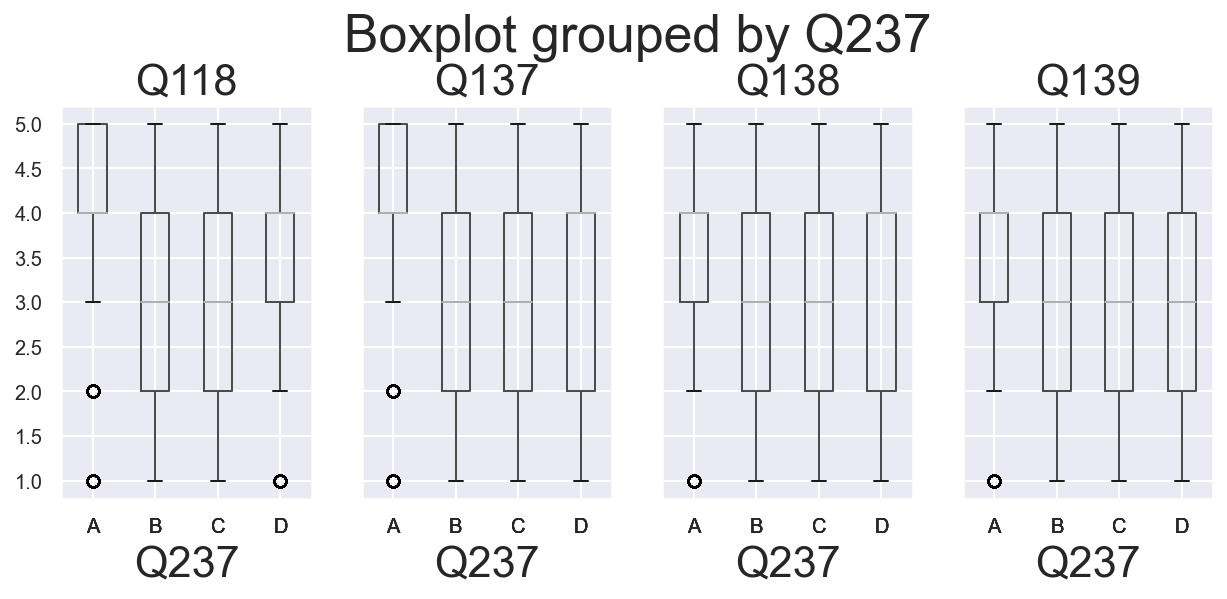

In [60]:
boxplot = dfGSI.boxplot(column=['Q118', 'Q137', 'Q138','Q139'], by= 'Q237',fontsize=10,layout=(2,4),figsize=(10,8))  

# We also want to know whether the Q118 to Q139 has some corelations, grouped by Q237 ( the decisions).
# below reg plots are paired questions reg corelations, the slop are positive, which indicated the people who rated high scores in one of the GSI questions, would mostly rate high for the other questions in GSI. 
#Q118	my_agency	I recommend my organization as a good place to work.
#Q137	individual	Considering everything_ how satisfied are you with your job?
#Q138	individual	Considering everything_ how satisfied are you with your pay?
#Q139	individual	Considering everything_ how satisfied are you with your organization?

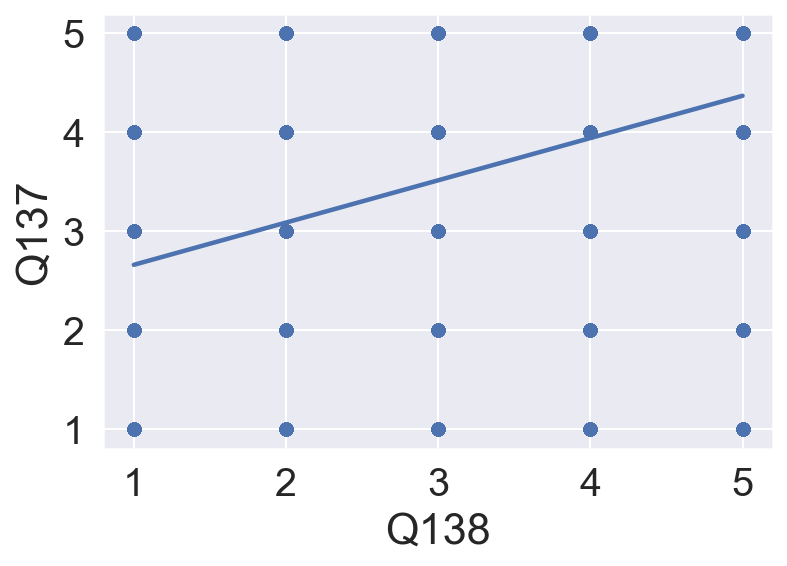

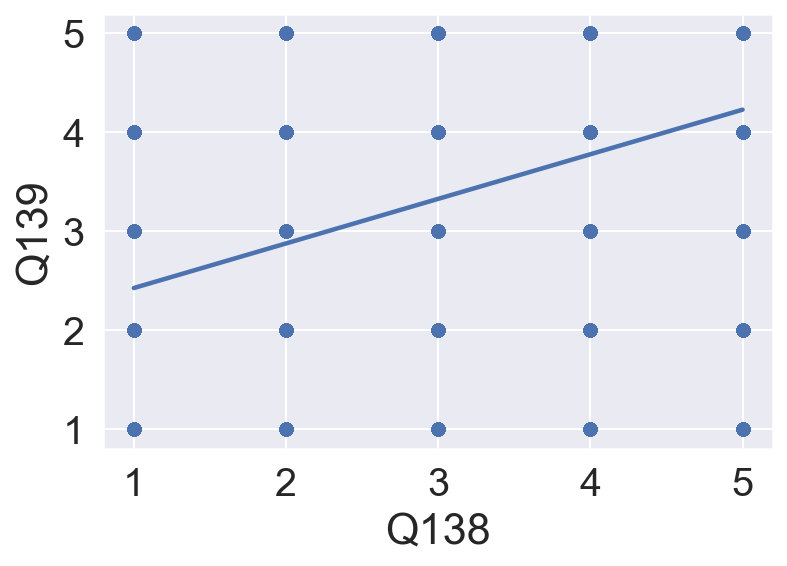

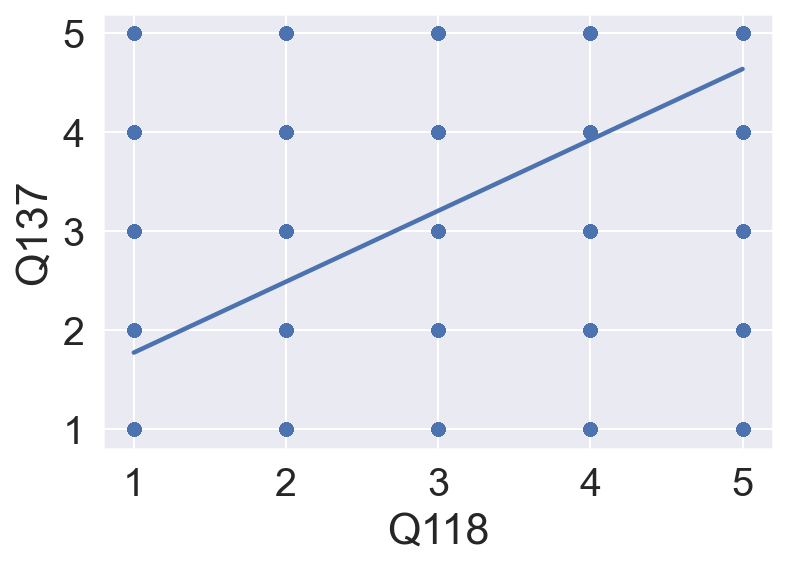

In [45]:
sns.regplot(x=dfGSI["Q138"], y=dfGSI["Q137"], scatter=True, fit_reg=True)
plt.show()
sns.regplot(x=dfGSI["Q138"], y=dfGSI["Q139"], fit_reg=True)
plt.show()
sns.regplot(x=dfGSI["Q118"], y=dfGSI["Q137"], fit_reg=True)
plt.show()


# below is an example of the regression plots of GSI questions Q137 vs Q118, grouped by Q237 decisions . The results indicated the scores rated to quetions Q137 vs Q118 are positivly correlated, regardless of the Q237 decision, which means, from all the survey takers,  if the people answer high score in Q137 , they will rated high in Q118.

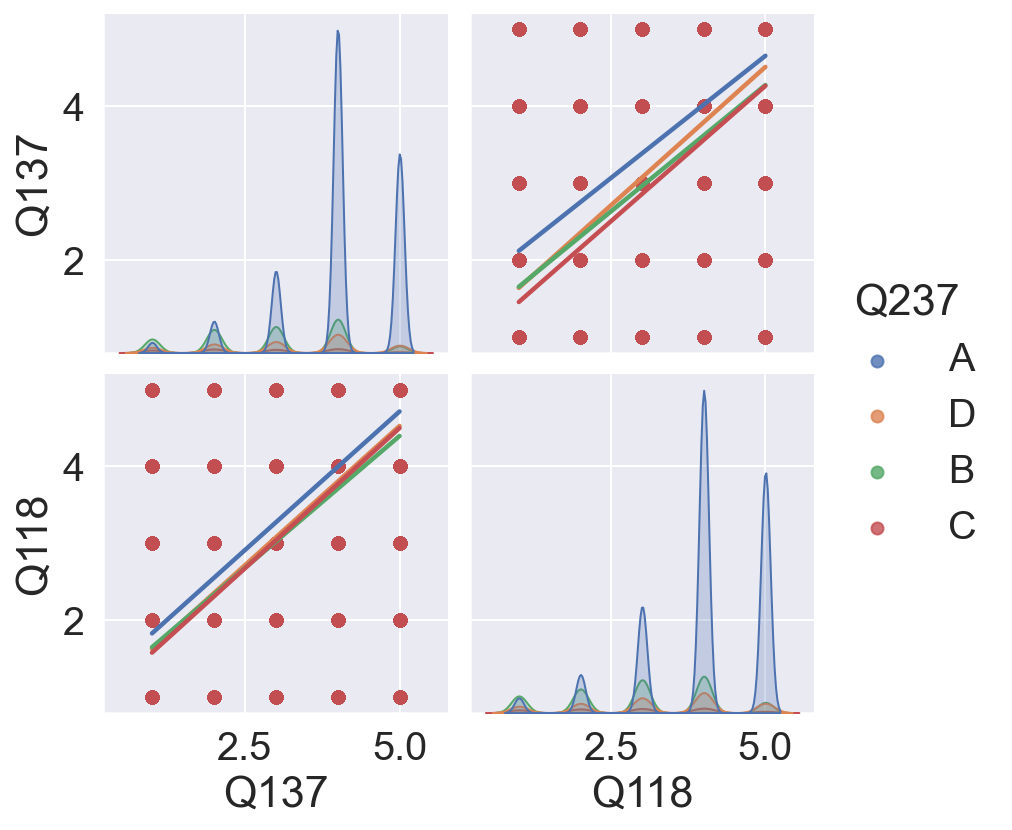

In [52]:
# only take the year 2016 data for analysis, otherwise the analysis takes forever on my computer 
g = sns.pairplot(dfGSI[dfGSI['year'] == 2016], height=3, kind="reg",
                 vars=["Q137", "Q118"], hue="Q237")

# Below analyses summarized  the average scores from all the quesions in the GSI, grouped by Q237 decisions. The resutls indicated, overall, the people who stayed rated high score in GSI, but those who decided to leave rated lower GSI score, and the ones who decided leave and find a job outside the Federal rated lowest GSI scores. 

In [47]:
dfmean=dfGSI.groupby('Q237').mean()
dfmean=dfmean.drop(columns=['year'])
dfmean

,Q118,Q137,Q138,Q139
Q237,,,,
A,4.061347,4.064111,3.766182,3.870640
B,3.074909,3.025110,3.115927,2.878417
C,2.911325,2.803113,2.818577,2.668457
D,3.324195,3.324463,3.342082,3.122453


In [48]:
dfmean=dfmean.transpose()
dfmean

Q237,A,B,C,D
Q118,4.061347,3.074909,2.911325,3.324195
Q137,4.064111,3.025110,2.803113,3.324463
Q138,3.766182,3.115927,2.818577,3.342082
Q139,3.870640,2.878417,2.668457,3.122453


<AxesSubplot:>

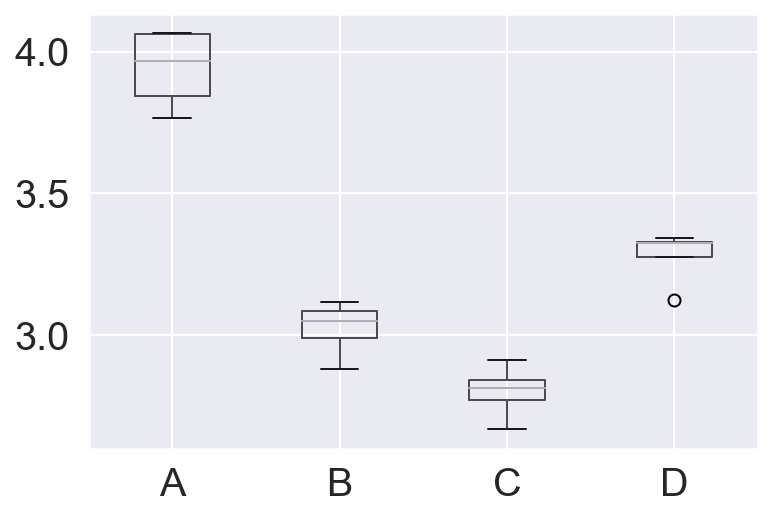

In [49]:
dfmean.boxplot()

In [50]:
print('People who left the federal have lowest score of GSI index.')

People who left the federal have lowest score of GSI index.
